# Import

In [147]:
import pandas as pd
import numpy as np
import plotly.express as px
import ast
import re
import os
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# Project Description


<b><p> I got the data from Kaggle data set where it's being made for the practice cleaning data, the author scrape data from IMDB </p></b>

<p> I am a Data Scientist whom work in small team it's mean we are also have to do the data cleansing ourself. So, I took this data set and gave it to my interns to try</p>

<p> As a senpai I have to do the same thing to be a good example as well, but then I just thought, if would be a good practice, If I do any further than just cleansing and held it on the shelf </p>

<p> So I began to develop the thought process to make this project to be a processing raw data for the SQL practice, after we do EDA process, we can save it as a table for SQL to do furthur analysis</p>

# Ingestion

In [148]:
movie_df = pd.read_csv('F:\\For work\\Data set\\movies.csv')
print("Therer are {} rows in the dataset".format(movie_df.shape[0]))

Therer are 9999 rows in the dataset


In [149]:
# lower case all columns
movie_df.columns = movie_df.columns.str.lower()

# EDA

<Axes: >

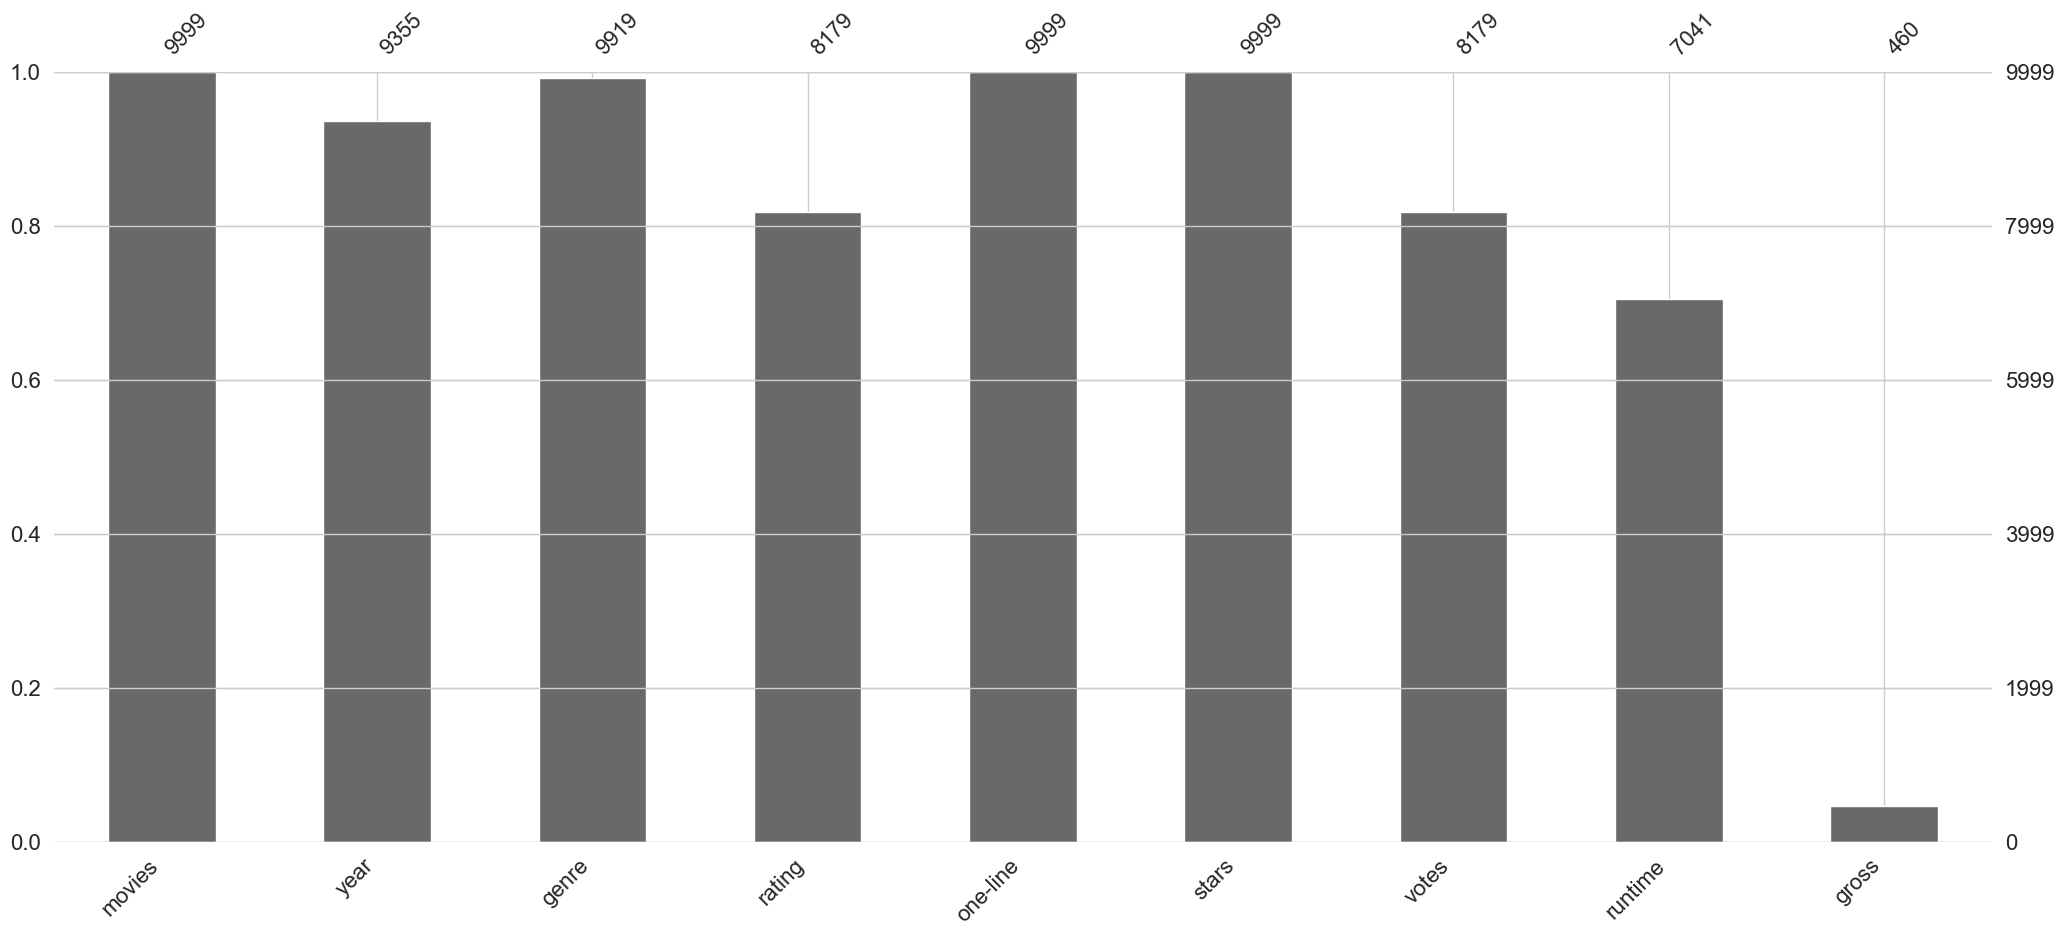

In [150]:
msno.bar(movie_df)

In [151]:
#Check the columns
movie_df.columns
print("The columns in the dataset are: ", movie_df.columns)

The columns in the dataset are:  Index(['movies', 'year', 'genre', 'rating', 'one-line', 'stars', 'votes',
       'runtime', 'gross'],
      dtype='object')


In [152]:
movie_df.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [153]:
# Check type of value in each column
movie_df.dtypes
print("The data types in the dataset are: ", movie_df.dtypes)

The data types in the dataset are:  movies       object
year         object
genre        object
rating      float64
one-line     object
stars        object
votes        object
runtime     float64
gross        object
dtype: object


## Observations

1. There are a lot of missing values in the dataset
2. The most missing values are from column 'gross' which indicate to the movie box office revenue
3. There some year that are missing
4. The data are not clean yet, need to perform data preprocessing
5. The 'stars' column contain a list of stars (cast) and director, separate by breakline
6. The 'year' column have weird - and cut off need to remove parenthesis and -
7. Data type are still invalid and can be possibly impute the NaN in gross, votes, and runtime with 0


In [154]:
# Check the number of unique values in each column
movie_df.nunique()

movies      6817
year         438
genre        510
rating        82
one-line    8688
stars       7877
votes       4129
runtime      261
gross        332
dtype: int64

In [155]:
# Check for duplicate rows
movie_df.duplicated().sum()

431

In [156]:
# see the duplicated rows
movie_df[movie_df.duplicated()]

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
6833,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6835,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6836,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN,NaN
6837,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
6838,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9990,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9991,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN
9992,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN,NaN


In [157]:
# check year column
movie_df['year'].value_counts()

year
(2020– )           892
(2021– )           658
(2020)             639
(2019– )           549
(2019)             544
                  ... 
(1999– )             1
(I) (2013–2016)      1
(2002–2005)          1
(2010–2015)          1
(1985– )             1
Name: count, Length: 438, dtype: int64

# Data Preprocessing

In [158]:
def clean_text(str):
    """ Clean text by removing \n and trailing white spaces.

    Args:
        str (str): input text to clean

    Returns:
        str: cleaned text
    """
    text = re.sub(r'\n', '', str)
    text = text.strip()

    return text 

# Clean the text in the columns
movie_df['movies'] = movie_df['movies'].apply(clean_text)
movie_df['one-line'] = movie_df['one-line'].apply(clean_text)    

In [159]:
#remove /n from genre column
movie_df['genre'] = movie_df['genre'].str.replace('\n', '')

In [160]:
movie_df['genre'].value_counts()

genre
Comedy                                      852
Animation, Action, Adventure                693
Drama                                       562
Documentary                                 498
Crime, Drama, Mystery                       336
                                           ... 
Fantasy, Horror, Romance                      1
Family, Music, Romance                        1
Fantasy, Music                                1
Comedy, Family, Sci-Fi                        1
Action, Drama, Western                        1
Name: count, Length: 510, dtype: int64

In [161]:
def split_genre(genre_column):
    """Function to split comma-separated genre values into dictionaries for easy normalize.

    Args:
        genre_column (Series): The 'genre' column of the DataFrame.

    Returns:
        Series: 'genre' column with values converted into dictionaries.
    """
    # Ensure the column is of type string
    genre_column = genre_column.astype(str)
    
    def transform_genre(x):
        if x:
            genres = {i: genre.strip() for i, genre in enumerate(x.split(','))}
            return genres
        else:
            return {}
    
    # Apply the transformation
    return genre_column.apply(transform_genre)

movie_df['genre'] = split_genre(movie_df['genre'])

In [162]:
movie_df['genre'].value_counts()

genre
{0: 'Comedy'}                                    852
{0: 'Animation', 1: 'Action', 2: 'Adventure'}    693
{0: 'Drama'}                                     562
{0: 'Documentary'}                               498
{0: 'Crime', 1: 'Drama', 2: 'Mystery'}           336
                                                ... 
{0: 'Action', 1: 'Drama', 2: 'Western'}            1
{0: 'Comedy', 1: 'Horror', 2: 'Talk-Show'}         1
{0: 'Family', 1: 'Music', 2: 'Romance'}            1
{0: 'Animation', 1: 'Adventure', 2: 'Horror'}      1
{0: 'Documentary', 1: 'Crime', 2: 'Thriller'}      1
Name: count, Length: 511, dtype: int64

In [163]:
def clean_year_column(year_column):
    """Function to clean the 'year' column of a DataFrame.

    Args:
        year_column (Series): The 'year' column of the DataFrame.

    Returns:
        Series: Cleaned 'year' column.
    """
    # Remove parentheses and extra characters
    year_column = year_column.str.replace(r'[\(\)I]', '', regex=True)
    
    # Fill missing values with empty string
    year_column.fillna('', inplace=True)
    
    # Split the string by '–' and keep the first part if present
    year_column = year_column.apply(lambda x: x.split('–')[0] if '–' in x else x)
    
    # Extract the year using regex
    year_column = year_column.str.extract(r'(\d+)')
    
    return year_column

# Applying the function to the 'year' column of the DataFrame
movie_df['year'] = clean_year_column(movie_df['year'])

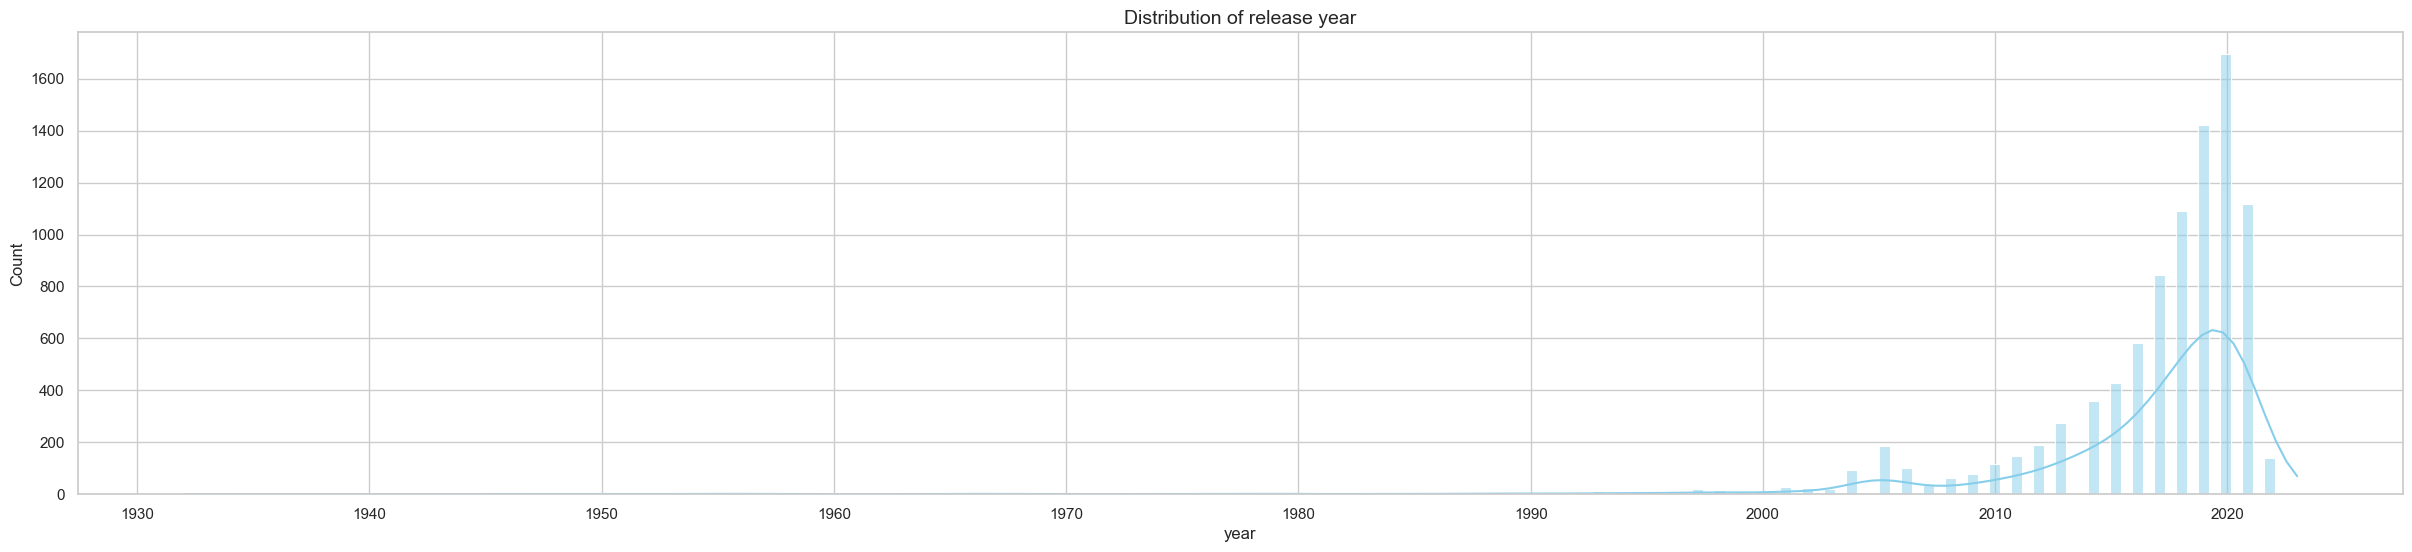

In [88]:
#Visualize the distribution of the 'year' column
import matplotlib.pyplot as plt

# # Convert the 'release date' column to datetime object
movie_df['year'] = pd.to_datetime(movie_df['year'])

# Set the style of the visualization
sns.set(style='whitegrid')

# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(30, 6))

#Plotting
sns.histplot(movie_df['year'], kde=True, color='skyblue', ax=ax)

# Set title of the visualization
ax.set_title('Distribution of release year', fontsize=14)

plt.show()

In [19]:
movie_df.shape

(9999, 9)

In [164]:
#Fill missing values in the 'gross' column
movie_df['gross'] = movie_df['gross'].fillna('0')
movie_df['votes'] = movie_df['votes'].fillna('0')

In [165]:
# search the row where stars columns contains this pattern

patern = r'Directors:\s*([^|]*)'

check = movie_df['stars'].str.contains(patern, case=False, na=False)

movie_df[check]

C:\Users\Junior\AppData\Local\Temp\ipykernel_11372\493429858.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  check = movie_df['stars'].str.contains(patern, case=False, na=False)


,movies,year,genre,rating,one-line,stars,votes,runtime,gross
56,365 dni,2020,"{0: 'Drama', 1: 'Romance'}",3.3,Massimo is a member of the Sicilian Mafia fami...,"\n Directors:\nBarbara Bialowas, \nTomasz M...","63,620",114.0,0
73,A Classic Horror Story,2021,"{0: 'Drama', 1: 'Horror', 2: 'Mystery'}",5.7,"In this gruesome suspense film, strangers trav...","\n Directors:\nRoberto De Feo, \nPaolo Stri...","8,822",95.0,0
83,Trollhunters: Rise of the Titans,2021,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",6.9,The heroes from the Trollhunters series team-u...,"\n Directors:\nJohane Matte, \nFrancisco Ru...","2,353",104.0,0
167,The Mitchells vs the Machines,2021,"{0: 'Animation', 1: 'Adventure', 2: 'Comedy'}",7.7,"A quirky, dysfunctional family's road trip is ...","\n Directors:\nMichael Rianda, \nJeff Rowe\...","69,482",113.0,0
202,Things Heard & Seen,2021,"{0: 'Drama', 1: 'Horror', 2: 'Mystery'}",5.3,An artist relocates to the Hudson Valley and b...,"\n Directors:\nShari Springer Berman, \nRob...","24,250",121.0,0
...,...,...,...,...,...,...,...,...,...
9858,Surviving Summer,2022,{0: 'Drama'},NaN,Add a Plot,"\n Directors:\nBen Chessell, \nCharlotte Ge...",0,NaN,0
9881,Fatma,2021,"{0: 'Crime', 1: 'Drama', 2: 'Thriller'}",7.5,Bayram asks Fatma to make an illicit delivery....,"\n Directors:\nOzer Feyzioglu, \nOzgur Onur...",200,NaN,0
9882,Fatma,2021,"{0: 'Crime', 1: 'Drama', 2: 'Thriller'}",7.5,Fatma learns the unsettling truth about Zafer'...,"\n Directors:\nOzer Feyzioglu, \nOzgur Onur...",192,NaN,0
9920,Girl From Nowhere,2018,"{0: 'Crime', 1: 'Drama', 2: 'Fantasy'}",8.5,"At Pantanawittaya, students are expected to st...","\n Directors:\nPaween Purijitpanya, \nSuraw...",158,NaN,0


In [166]:
#Check the movie name 'Theo Who Lived'
check = movie_df[movie_df['movies'] == 'Theo Who Lived']

check

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
6056,Theo Who Lived,2016,{0: 'Documentary'},6.8,A documentary on American journalist Theo Padn...,\n Director:\nDavid Schisgall\n| \n Star...,111,86.0,$0.01M


In [167]:
check.iloc[0][5]

C:\Users\Junior\AppData\Local\Temp\ipykernel_11372\1279556772.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  check.iloc[0][5]


'\n    Director:\nDavid Schisgall\n| \n    Star:\nTheo Padnos\n'

In [168]:
import re

director_pattern = r'Director:\s*([^|]*)'
director_pattern2 = r'Directors?:\s*([^|]*)'  # Updated pattern for multiple directors

def extract_director(stars):
    """ Function to extract the director from the stars column

    Args:
        stars (column): feed the stars columns to extract the director

    Returns:
        directors: return the director name from the stars column
    """
    pattern1 = director_pattern
    pattern2 = director_pattern2
    
    for pattern in [pattern1, pattern2]:
        directors = re.findall(pattern, stars)  
        if directors:
            return ', '.join(directors)

# Example usage
movie_df['director'] = movie_df['stars'].apply(extract_director)
movie_df['director'] = movie_df['director'].str.replace('\n', '')


In [169]:
movie_df

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,director
0,Blood Red Sky,2021,"{0: 'Action', 1: 'Horror', 2: 'Thriller'}",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,0,Peter Thorwarth
1,Masters of the Universe: Revelation,2021,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",5.0,The war for Eternia begins again in what may b...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,0,None
2,The Walking Dead,2010,"{0: 'Drama', 1: 'Horror', 2: 'Thriller'}",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,0,None
3,Rick and Morty,2013,"{0: 'Animation', 1: 'Adventure', 2: 'Comedy'}",9.2,An animated series that follows the exploits o...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,0,None
4,Army of Thieves,2021,"{0: 'Action', 1: 'Crime', 2: 'Horror'}",NaN,"A prequel, set before the events of Army of th...",\n Director:\nMatthias Schweighöfer\n| \n ...,0,NaN,0,Matthias Schweighöfer
...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,2021,"{0: 'Adventure', 1: 'Drama', 2: 'Fantasy'}",NaN,Add a Plot,\n \n Stars:\nMorgan Taylor Camp...,0,NaN,0,None
9995,Arcane,2021,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",NaN,Add a Plot,\n,0,NaN,0,None
9996,Heart of Invictus,2022,"{0: 'Documentary', 1: 'Sport'}",NaN,Add a Plot,\n Director:\nOrlando von Einsiedel\n| \n ...,0,NaN,0,Orlando von Einsiedel
9997,The Imperfects,2021,"{0: 'Adventure', 1: 'Drama', 2: 'Fantasy'}",NaN,Add a Plot,\n Director:\nJovanka Vuckovic\n| \n Sta...,0,NaN,0,Jovanka Vuckovic


In [170]:
import re

def extract_stars(stars):
    """ Function to extract the stars from the stars column

    Args:
        stars (column): feed the stars columns to extract the stars

    Returns:
        stars: return the stars name from the stars column
    """
    pattern1 = r'Stars:\s*([^|]*)'
    pattern2 = r'Star:\s*(.*?)\n'
    
    all_stars = []
    for pattern in [pattern1, pattern2]:
        matches = re.findall(pattern, stars)
        if matches:
            all_stars.extend(matches)
    
    return ', '.join(all_stars)

# Applying the function to the 'stars' column
movie_df['stars'] = movie_df['stars'].apply(extract_stars)
movie_df['stars'] = movie_df['stars'].str.replace('\n', ',')

In [171]:
def split_stars(stars_column):
    """Function to split comma-separated star values into dictionaries.

    Args:
        stars_column (Series): The 'stars' column of the DataFrame.

    Returns:
        Series: 'stars' column with values converted into dictionaries.
    """
    # Ensure the column is of type string
    stars_column = stars_column.astype(str)
    
    def transform_stars(x):
        if x:
            stars = {i: star.strip() for i, star in enumerate(x.split(',')) if star.strip() != ''}
            return stars
        else:
            return {}
    
    # Apply the transformation
    return stars_column.apply(transform_stars)

In [172]:
movie_df['stars'] = split_stars(movie_df['stars'])

In [173]:
movie_df.stars.value_counts()

stars
{}                                                                                                     793
{0: 'Emmanuel Esparza', 2: 'Essined Aponte', 4: 'Manuel Navarro', 6: 'Álvaro Benet'}                    58
{0: 'Russell Curry', 2: 'Hunter Deno', 4: 'Kainalu Moya', 6: 'Tessa Rao'}                               42
{0: 'Rorrie D. Travis', 2: 'Jasmeet Baduwalia', 4: 'Jacqueline Scislowski', 6: 'Abraham Rodriguez'}     41
{0: 'Zach Tyler', 2: 'Mae Whitman', 4: 'Jack De Sena', 6: 'Michaela Jill Murphy'}                       35
                                                                                                      ... 
{0: 'Jessica Williams', 2: 'Chris O'Dowd', 4: 'LaKeith Stanfield', 6: 'Noël Wells'}                      1
{0: 'Eugenio Mastrandrea', 2: 'Roberta Rigano', 4: 'Paride Benassai', 6: 'Jonathan Dylan King'}          1
{0: 'Bobby Deol', 2: 'Anup Soni', 4: 'Joy Sengupta', 6: 'Hitesh Bhojraj'}                                1
{0: 'Ray Chase', 2: 'Doug Stone

In [174]:
#Reset key index in the 'star' column to further normalize the data in to the columns name
def reset_index(stars_column):
    """Function to reset the index of the 'stars' column.

    Args:
        stars_column (Series): The 'stars' column of the DataFrame.

    Returns:
        Series: 'stars' column with the index reset.
    """
    def reset_index(x):
        if x:
            return {i: star for i, (key, star) in enumerate(x.items())}
        else:
            return {}
    
    # Apply the transformation
    return stars_column.apply(reset_index)  

In [175]:
movie_df['stars'] = reset_index(movie_df['stars'])

In [176]:
movie_df.stars.value_counts()

stars
{}                                                                                                     793
{0: 'Emmanuel Esparza', 1: 'Essined Aponte', 2: 'Manuel Navarro', 3: 'Álvaro Benet'}                    58
{0: 'Russell Curry', 1: 'Hunter Deno', 2: 'Kainalu Moya', 3: 'Tessa Rao'}                               42
{0: 'Rorrie D. Travis', 1: 'Jasmeet Baduwalia', 2: 'Jacqueline Scislowski', 3: 'Abraham Rodriguez'}     41
{0: 'Zach Tyler', 1: 'Mae Whitman', 2: 'Jack De Sena', 3: 'Michaela Jill Murphy'}                       35
                                                                                                      ... 
{0: 'Jessica Williams', 1: 'Chris O'Dowd', 2: 'LaKeith Stanfield', 3: 'Noël Wells'}                      1
{0: 'Eugenio Mastrandrea', 1: 'Roberta Rigano', 2: 'Paride Benassai', 3: 'Jonathan Dylan King'}          1
{0: 'Bobby Deol', 1: 'Anup Soni', 2: 'Joy Sengupta', 3: 'Hitesh Bhojraj'}                                1
{0: 'Ray Chase', 1: 'Doug Stone

In [177]:
def clean_votes(votes):
    """Function to clean the 'votes' column of a DataFrame.

    Args:
        votes (Series): The 'votes' column of the DataFrame.

    Returns:
        Series: Cleaned 'votes' column.
        
    """
    votes = votes.str.replace(',', '').astype(int)

    return votes

movie_df['votes'] = clean_votes(movie_df['votes'])

In [178]:
def clean_gross(gross):
    """Function to clean the 'gross' column of a DataFrame.

    Args:
        gross (Series): The 'gross' column of the DataFrame.

    Returns:
        Series: Cleaned 'gross' column.
    """
    # Remove dollar sign and commas
    gross = gross.str.replace(r'[\$,]', '', regex=True)

    # Convert 'M' to millions
    gross = gross.str.replace('M', 'e6')

    # Convert to float
    gross = gross.astype(float)

    return gross

movie_df['gross'] = clean_gross(movie_df['gross'])

In [179]:
movie_df.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,director
0,Blood Red Sky,2021,"{0: 'Action', 1: 'Horror', 2: 'Thriller'}",6.1,A woman with a mysterious illness is forced in...,"{0: 'Peri Baumeister', 1: 'Carl Anton Koch', 2...",21062,121.0,0.0,Peter Thorwarth
1,Masters of the Universe: Revelation,2021,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",5.0,The war for Eternia begins again in what may b...,"{0: 'Chris Wood', 1: 'Sarah Michelle Gellar', ...",17870,25.0,0.0,None
2,The Walking Dead,2010,"{0: 'Drama', 1: 'Horror', 2: 'Thriller'}",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"{0: 'Andrew Lincoln', 1: 'Norman Reedus', 2: '...",885805,44.0,0.0,None
3,Rick and Morty,2013,"{0: 'Animation', 1: 'Adventure', 2: 'Comedy'}",9.2,An animated series that follows the exploits o...,"{0: 'Justin Roiland', 1: 'Chris Parnell', 2: '...",414849,23.0,0.0,None
4,Army of Thieves,2021,"{0: 'Action', 1: 'Crime', 2: 'Horror'}",NaN,"A prequel, set before the events of Army of th...","{0: 'Matthias Schweighöfer', 1: 'Nathalie Emma...",0,NaN,0.0,Matthias Schweighöfer


In [180]:
movie_df['runtime'] = movie_df['runtime'].fillna('0')
movie_df['runtime'] = movie_df['runtime'].astype(int)

In [181]:
movie_df['rating'] = movie_df['rating'].fillna(0)

In [182]:
movie_df.head()

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,director
0,Blood Red Sky,2021,"{0: 'Action', 1: 'Horror', 2: 'Thriller'}",6.1,A woman with a mysterious illness is forced in...,"{0: 'Peri Baumeister', 1: 'Carl Anton Koch', 2...",21062,121,0.0,Peter Thorwarth
1,Masters of the Universe: Revelation,2021,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",5.0,The war for Eternia begins again in what may b...,"{0: 'Chris Wood', 1: 'Sarah Michelle Gellar', ...",17870,25,0.0,None
2,The Walking Dead,2010,"{0: 'Drama', 1: 'Horror', 2: 'Thriller'}",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"{0: 'Andrew Lincoln', 1: 'Norman Reedus', 2: '...",885805,44,0.0,None
3,Rick and Morty,2013,"{0: 'Animation', 1: 'Adventure', 2: 'Comedy'}",9.2,An animated series that follows the exploits o...,"{0: 'Justin Roiland', 1: 'Chris Parnell', 2: '...",414849,23,0.0,None
4,Army of Thieves,2021,"{0: 'Action', 1: 'Crime', 2: 'Horror'}",0.0,"A prequel, set before the events of Army of th...","{0: 'Matthias Schweighöfer', 1: 'Nathalie Emma...",0,0,0.0,Matthias Schweighöfer


### Visualize Distribution of the data

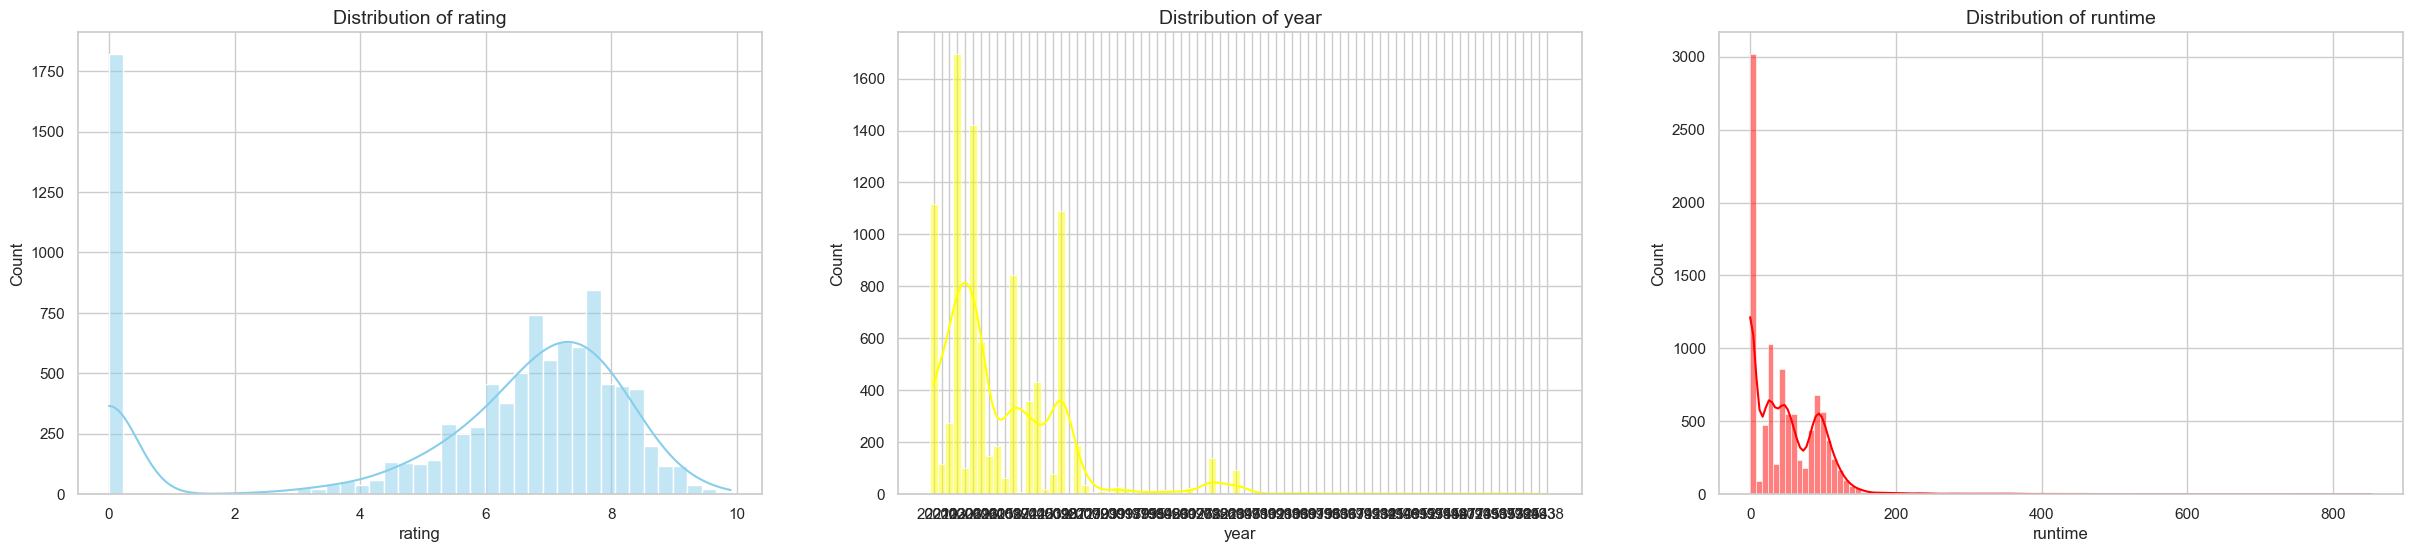

In [183]:
# Set the style of the visualization
sns.set(style='whitegrid')

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(30, 6))

sns.histplot(movie_df['rating'], kde=True, color='skyblue', ax=ax[0])

sns.histplot(movie_df['year'], kde=True, color='yellow', ax=ax[1])

sns.histplot(movie_df['runtime'], kde=True, color='red', ax=ax[2])

# Set title of the visualization
ax[0].set_title('Distribution of rating', fontsize=14)
ax[1].set_title('Distribution of year', fontsize=14)
ax[2].set_title('Distribution of runtime', fontsize=14)

plt.show()


In [184]:
#Drop the row where the stars have empty {} value
movie_df = movie_df[movie_df['stars'] != {}]

In [185]:
movie_df.shape

(9206, 10)

In [186]:
movie_df['movies'].value_counts()

movies
Bleach: Burîchi                             66
Avatar: The Last Airbender                  62
La Reina de Indias y el Conquistador        61
Dexter                                      49
The Drew Barrymore Show                     45
                                            ..
Eulachacha Waikiki                           1
Money, Explained                             1
Kidou Senshi Gundam: Tekketsu no Orphans     1
Cheese in the Trap                           1
God's Favorite Idiot                         1
Name: count, Length: 5928, dtype: int64

In [187]:
movie_df[movie_df['movies'] == 'Bleach: Burîchi']

,movies,year,genre,rating,one-line,stars,votes,runtime,gross,director
447,Bleach: Burîchi,2004,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",8.1,"High school student Ichigo Kurosaki, who has t...","{0: 'Johnny Yong Bosch', 1: 'Michelle Ruff', 2...",46537,24,0.0,None
6536,Bleach: Burîchi,2004,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",8.7,Captain Kurotsushi decides that rather than ki...,"{0: 'Noriaki Sugiyama', 1: 'Ryûsei Nakao', 2: ...",181,23,0.0,"Noriyuki Abe, Kazunori Mizuno"
6555,Bleach: Burîchi,2004,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",7.9,"In order to prove how useless Shinigamis are, ...","{0: 'Masakazu Morita', 1: 'Fumiko Orikasa', 2:...",209,24,0.0,"Noriyuki Abe, Kôji Aritomi"
6556,Bleach: Burîchi,2004,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",7.7,"Ichigo runs into Rukia at school, where she's ...","{0: 'Masakazu Morita', 1: 'Fumiko Orikasa', 2:...",325,24,0.0,"Noriyuki Abe, Jun'ya Koshiba"
6557,Bleach: Burîchi,2004,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",8.9,"After defeating Captain Hitsugaya, Captain Aiz...","{0: 'Masakazu Morita', 1: 'Fumiko Orikasa', 2:...",176,24,0.0,"Noriyuki Abe, Akira Shimizu"
...,...,...,...,...,...,...,...,...,...,...
6614,Bleach: Burîchi,2004,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",8.2,"In her holding cell, Rukia has a dream that sh...","{0: 'Masakazu Morita', 1: 'Fumiko Orikasa', 2:...",154,23,0.0,"Noriyuki Abe, Jun'ya Koshiba"
6615,Bleach: Burîchi,2004,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",7.0,Ichigo and his friends have returned from the ...,"{0: 'Masakazu Morita', 1: 'Fumiko Orikasa', 2:...",120,26,0.0,"Noriyuki Abe, Mitsutaka Noshitani"
6616,Bleach: Burîchi,2004,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",7.6,"Ichigo, Chad, Ishida and Orihime concentrate o...","{0: 'Masakazu Morita', 1: 'Fumiko Orikasa', 2:...",182,24,0.0,"Noriyuki Abe, Akira Shimizu"
6617,Bleach: Burîchi,2004,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",8.7,Central 46 is the highest judicial body in the...,"{0: 'Fumiko Orikasa', 1: 'Show Hayami', 2: 'Kô...",168,24,0.0,"Noriyuki Abe, Kumi Ichiguchi"


## Observations

1. After cleaning the dataset and removing entries without stars, there are 9206 rows and 10 columns.
2. There are duplicate data points which represent the same movie scraped at different time frames.
3. These duplicates can be left as is for further aggregation and analysis.
4. This dataset can be further used for analysis purposes.

# Normalize data

In [188]:
key = [key for key in movie_df['stars'].items()]
value = [value.items() for value in movie_df['stars'].values]
# value_items = [value.items() for value in movie_df['stars'].values]

print(key)
print(value)

[(0, {0: 'Peri Baumeister', 1: 'Carl Anton Koch', 2: 'Alexander Scheer', 3: 'Kais Setti'}), (1, {0: 'Chris Wood', 1: 'Sarah Michelle Gellar', 2: 'Lena Headey', 3: 'Mark Hamill'}), (2, {0: 'Andrew Lincoln', 1: 'Norman Reedus', 2: 'Melissa McBride', 3: 'Lauren Cohan'}), (3, {0: 'Justin Roiland', 1: 'Chris Parnell', 2: 'Spencer Grammer', 3: 'Sarah Chalke'}), (4, {0: 'Matthias Schweighöfer', 1: 'Nathalie Emmanuel', 2: 'Ruby O. Fee', 3: 'Stuart Martin'}), (5, {0: 'Chase Stokes', 1: 'Madelyn Cline', 2: 'Madison Bailey', 3: 'Jonathan Daviss'}), (6, {0: 'Shailene Woodley', 1: 'Joe Alwyn', 2: 'Wendy Nottingham', 3: 'Felicity Jones'}), (7, {0: 'Michael C. Hall', 1: 'Jennifer Carpenter', 2: 'David Zayas', 3: 'James Remar'}), (8, {0: 'Maitreyi Ramakrishnan', 1: 'Poorna Jagannathan', 2: 'Darren Barnet', 3: 'John McEnroe'}), (9, {0: 'Alexandra Breckenridge', 1: 'Martin Henderson', 2: 'Colin Lawrence', 3: 'Tim Matheson'}), (10, {0: 'Karen Gillan', 1: 'Lena Headey', 2: 'Carla Gugino', 3: 'Michelle Yeo

In [189]:
value = [value.items() for value in movie_df['stars'].values]

for dictionary_items in value:
    for k, v in dictionary_items:
        print(k, v)

0 Peri Baumeister
1 Carl Anton Koch
2 Alexander Scheer
3 Kais Setti
0 Chris Wood
1 Sarah Michelle Gellar
2 Lena Headey
3 Mark Hamill
0 Andrew Lincoln
1 Norman Reedus
2 Melissa McBride
3 Lauren Cohan
0 Justin Roiland
1 Chris Parnell
2 Spencer Grammer
3 Sarah Chalke
0 Matthias Schweighöfer
1 Nathalie Emmanuel
2 Ruby O. Fee
3 Stuart Martin
0 Chase Stokes
1 Madelyn Cline
2 Madison Bailey
3 Jonathan Daviss
0 Shailene Woodley
1 Joe Alwyn
2 Wendy Nottingham
3 Felicity Jones
0 Michael C. Hall
1 Jennifer Carpenter
2 David Zayas
3 James Remar
0 Maitreyi Ramakrishnan
1 Poorna Jagannathan
2 Darren Barnet
3 John McEnroe
0 Alexandra Breckenridge
1 Martin Henderson
2 Colin Lawrence
3 Tim Matheson
0 Karen Gillan
1 Lena Headey
2 Carla Gugino
3 Michelle Yeoh
0 Tom Ellis
1 Lesley-Ann Brandt
2 Lauren German
3 D.B. Woodside
0 Kiana Madeira
1 Olivia Scott Welch
2 Benjamin Flores Jr.
3 Julia Rehwald
0 Sarah Shahi
1 Mike Vogel
2 Adam Demos
3 Margaret Odette
0 Lady Gaga
1 Kathy Bates
2 Angela Bassett
3 Sarah P

In [190]:
def normalize_star_to_columns(data):
    """ Function to normalize a column containing dictionaries into separate columns.

    Args:
        data (DataFrame): The DataFrame containing the column to be normalized.
        col (str): The name of the column containing dictionaries.

    Returns:
        DataFrame: The updated DataFrame with normalized columns.
    """
    #Access each row in dataframe using iterrows, this will be overkill if we use on the system with large dataset(could using pd.Series.apply)
    for index, row in data.iterrows():
        # Access the dictionary in the specified column for each row
        stars_dict = row['stars']
        
        #Iterate over value in the row
        for key, value in stars_dict.items():
            # Create a new column in the DataFrame for each key in the dictionary, index will be the column name
            data.loc[index, f'star_{key}'] = value
    
    # Drop the original column
    data.drop(columns=['stars'], inplace=True)
        
    return data

In [191]:
movie_df = normalize_star_to_columns(movie_df)

C:\Users\Junior\AppData\Local\Temp\ipykernel_11372\4109946724.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[index, f'star_{key}'] = value
C:\Users\Junior\AppData\Local\Temp\ipykernel_11372\4109946724.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[index, f'star_{key}'] = value
C:\Users\Junior\AppData\Local\Temp\ipykernel_11372\4109946724.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [192]:
movie_df

,movies,year,genre,rating,one-line,votes,runtime,gross,director,star_0,star_1,star_2,star_3
0,Blood Red Sky,2021,"{0: 'Action', 1: 'Horror', 2: 'Thriller'}",6.1,A woman with a mysterious illness is forced in...,21062,121,0.0,Peter Thorwarth,Peri Baumeister,Carl Anton Koch,Alexander Scheer,Kais Setti
1,Masters of the Universe: Revelation,2021,"{0: 'Animation', 1: 'Action', 2: 'Adventure'}",5.0,The war for Eternia begins again in what may b...,17870,25,0.0,None,Chris Wood,Sarah Michelle Gellar,Lena Headey,Mark Hamill
2,The Walking Dead,2010,"{0: 'Drama', 1: 'Horror', 2: 'Thriller'}",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805,44,0.0,None,Andrew Lincoln,Norman Reedus,Melissa McBride,Lauren Cohan
3,Rick and Morty,2013,"{0: 'Animation', 1: 'Adventure', 2: 'Comedy'}",9.2,An animated series that follows the exploits o...,414849,23,0.0,None,Justin Roiland,Chris Parnell,Spencer Grammer,Sarah Chalke
4,Army of Thieves,2021,"{0: 'Action', 1: 'Crime', 2: 'Horror'}",0.0,"A prequel, set before the events of Army of th...",0,0,0.0,Matthias Schweighöfer,Matthias Schweighöfer,Nathalie Emmanuel,Ruby O. Fee,Stuart Martin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"{0: 'Drama', 1: 'Thriller'}",0.0,Add a Plot,0,0,0.0,Nicolai Rohde,Felix Klare,Romina Küper,Anna Maria Mühe,Robert Palfrader
9994,The Imperfects,2021,"{0: 'Adventure', 1: 'Drama', 2: 'Fantasy'}",0.0,Add a Plot,0,0,0.0,None,Morgan Taylor Campbell,Chris Cope,Iñaki Godoy,Rhianna Jagpal
9996,Heart of Invictus,2022,"{0: 'Documentary', 1: 'Sport'}",0.0,Add a Plot,0,0,0.0,Orlando von Einsiedel,Prince Harry,NaN,NaN,NaN
9997,The Imperfects,2021,"{0: 'Adventure', 1: 'Drama', 2: 'Fantasy'}",0.0,Add a Plot,0,0,0.0,Jovanka Vuckovic,Morgan Taylor Campbell,Iñaki Godoy,Rhianna Jagpal,Siddhartha Minhas


In [193]:
movie_df['genre'].value_counts()

genre
{0: 'Comedy'}                                        834
{0: 'Animation', 1: 'Action', 2: 'Adventure'}        623
{0: 'Drama'}                                         516
{0: 'Documentary'}                                   407
{0: 'Crime', 1: 'Drama', 2: 'Mystery'}               331
                                                    ... 
{0: 'Comedy', 1: 'Romance', 2: 'Sport'}                1
{0: 'Documentary', 1: 'Mystery', 2: 'Reality-TV'}      1
{0: 'Action', 1: 'Family'}                             1
{0: 'Crime', 1: 'Drama', 2: 'Western'}                 1
{0: 'Short', 1: 'Drama', 2: 'Sci-Fi'}                  1
Name: count, Length: 501, dtype: int64

In [194]:
def normalize_genre_to_columns(data):
    """ Function to normalize the 'genre' column into separate columns.

    Args:
        data (DataFrame): The DataFrame containing the 'genre' column.

    Returns:
        DataFrame: The updated DataFrame with normalized columns.
    """    
    # Iterate over the rows in the DataFrame
    for index, row in data.iterrows():
        # Access the dictionary in the 'genre' column for each row
        genre_dict = row['genre']
        
        # Iterate over the key-value pairs in the dictionary
        for key, value in genre_dict.items():
            # Create a new column in the DataFrame for each key in the dictionary
            data.loc[index, f'genre_{key}'] = value
            
    # Drop the original 'genre' column
    data.drop(columns=['genre'], inplace=True)
    
    return data

In [195]:
movie_df = normalize_genre_to_columns(movie_df)

C:\Users\Junior\AppData\Local\Temp\ipykernel_11372\3893429634.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[index, f'genre_{key}'] = value
C:\Users\Junior\AppData\Local\Temp\ipykernel_11372\3893429634.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[index, f'genre_{key}'] = value
C:\Users\Junior\AppData\Local\Temp\ipykernel_11372\3893429634.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [196]:
movie_df

,movies,year,rating,one-line,votes,runtime,gross,director,star_0,star_1,star_2,star_3,genre_0,genre_1,genre_2
0,Blood Red Sky,2021,6.1,A woman with a mysterious illness is forced in...,21062,121,0.0,Peter Thorwarth,Peri Baumeister,Carl Anton Koch,Alexander Scheer,Kais Setti,Action,Horror,Thriller
1,Masters of the Universe: Revelation,2021,5.0,The war for Eternia begins again in what may b...,17870,25,0.0,None,Chris Wood,Sarah Michelle Gellar,Lena Headey,Mark Hamill,Animation,Action,Adventure
2,The Walking Dead,2010,8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805,44,0.0,None,Andrew Lincoln,Norman Reedus,Melissa McBride,Lauren Cohan,Drama,Horror,Thriller
3,Rick and Morty,2013,9.2,An animated series that follows the exploits o...,414849,23,0.0,None,Justin Roiland,Chris Parnell,Spencer Grammer,Sarah Chalke,Animation,Adventure,Comedy
4,Army of Thieves,2021,0.0,"A prequel, set before the events of Army of th...",0,0,0.0,Matthias Schweighöfer,Matthias Schweighöfer,Nathalie Emmanuel,Ruby O. Fee,Stuart Martin,Action,Crime,Horror
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,0.0,Add a Plot,0,0,0.0,Nicolai Rohde,Felix Klare,Romina Küper,Anna Maria Mühe,Robert Palfrader,Drama,Thriller,NaN
9994,The Imperfects,2021,0.0,Add a Plot,0,0,0.0,None,Morgan Taylor Campbell,Chris Cope,Iñaki Godoy,Rhianna Jagpal,Adventure,Drama,Fantasy
9996,Heart of Invictus,2022,0.0,Add a Plot,0,0,0.0,Orlando von Einsiedel,Prince Harry,NaN,NaN,NaN,Documentary,Sport,NaN
9997,The Imperfects,2021,0.0,Add a Plot,0,0,0.0,Jovanka Vuckovic,Morgan Taylor Campbell,Iñaki Godoy,Rhianna Jagpal,Siddhartha Minhas,Adventure,Drama,Fantasy


In [197]:
#Rename the columns
rename_columns_dict = {
    'one-line': 'description',
    'star_0': 'star_1',
    'star_1': 'star_2',
    'star_2': 'star_3',
    'star_3': 'star_4',
    'genre_0': 'genre_1',
    'genre_1': 'genre_2',
    'genre_2': 'genre_3',
}

movie_df.rename(columns=rename_columns_dict, inplace=True)

C:\Users\Junior\AppData\Local\Temp\ipykernel_11372\4205545821.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.rename(columns=rename_columns_dict, inplace=True)


In [198]:
movie_df[movie_df['description'] == 'Add a Plot']

,movies,year,rating,description,votes,runtime,gross,director,star_1,star_2,star_3,star_4,genre_1,genre_2,genre_3
1916,Twilight of the Gods,NaN,0.0,Add a Plot,0,0,0.0,None,Pilou Asbæk,Jamie Chung,Jamie Clayton,Lauren Cohan,Animation,Action,Adventure
2610,Past Midnight,NaN,0.0,Add a Plot,0,0,0.0,Rick Famuyiwa,Keanu Reeves,NaN,NaN,NaN,Action,Adventure,Drama
2710,Thomas & Friends: All Engines Go!,2021,0.0,Add a Plot,0,30,0.0,None,Johnathan Michael,Shomoy James Mitchell,NaN,NaN,Animation,Adventure,Comedy
2775,The Princess Switch 3,2021,0.0,Add a Plot,0,0,0.0,Mike Rohl,Vanessa Hudgens,Nick Sagar,Remy Hii,Amanda Donohoe,Comedy,Drama,Family
3144,Our Man from Jersey,NaN,0.0,Add a Plot,0,0,0.0,None,Mark Wahlberg,Halle Berry,NaN,NaN,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,0.0,Add a Plot,0,0,0.0,Nicolai Rohde,Felix Klare,Romina Küper,Anna Maria Mühe,Robert Palfrader,Drama,Thriller,NaN
9994,The Imperfects,2021,0.0,Add a Plot,0,0,0.0,None,Morgan Taylor Campbell,Chris Cope,Iñaki Godoy,Rhianna Jagpal,Adventure,Drama,Fantasy
9996,Heart of Invictus,2022,0.0,Add a Plot,0,0,0.0,Orlando von Einsiedel,Prince Harry,NaN,NaN,NaN,Documentary,Sport,NaN
9997,The Imperfects,2021,0.0,Add a Plot,0,0,0.0,Jovanka Vuckovic,Morgan Taylor Campbell,Iñaki Godoy,Rhianna Jagpal,Siddhartha Minhas,Adventure,Drama,Fantasy


In [203]:
# Filter the rows where it's contain no description, votes, rating, gross, and runtime
movie_df = movie_df[
    (movie_df['votes'] >= 1) &
    (movie_df['rating'] >= 1) &
    (movie_df['gross'] >= 1.0) &
    (movie_df['runtime'] >= 1)
]

In [204]:
#Order the columns
column_order = [
    'movies', 'year', 'director', 'star_1', 'star_2', 'star_3', 'star_4',
    'genre_1', 'genre_2', 'genre_3', 'rating', 'votes', 'gross', 'runtime', 'description'
]

movie_df = movie_df[column_order]

In [205]:
movie_df.head()

,movies,year,director,star_1,star_2,star_3,star_4,genre_1,genre_2,genre_3,rating,votes,gross,runtime,description
77,The Hitman's Bodyguard,2017,Patrick Hughes,Ryan Reynolds,Samuel L. Jackson,Gary Oldman,Elodie Yung,Action,Comedy,Crime,6.9,205979,75470000.0,118,"The world's top bodyguard gets a new client, a..."
85,Jurassic Park,1993,Steven Spielberg,Sam Neill,Laura Dern,Jeff Goldblum,Richard Attenborough,Action,Adventure,Sci-Fi,8.1,897444,402450000.0,127,A pragmatic paleontologist visiting an almost ...
95,Don't Breathe,2016,Fede Alvarez,Stephen Lang,Jane Levy,Dylan Minnette,Daniel Zovatto,Crime,Horror,Thriller,7.1,237601,89220000.0,88,"Hoping to walk away with a massive fortune, a ..."
111,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,8.8,1713028,315540000.0,178,A meek Hobbit from the Shire and eight compani...
125,Escape Room,2019,Adam Robitel,Taylor Russell,Logan Miller,Jay Ellis,Tyler Labine,Action,Adventure,Horror,6.4,99351,57010000.0,99,Six strangers find themselves in a maze of dea...


# Save data to SQL database using sqlite

In [206]:
import os 
import sqlite3

db_paths = 'F:\For work\Database/kaggle_movie.db'

if not os.path.exists(db_paths):
    conn = sqlite3.connect(db_paths)
    conn.close()

conn = sqlite3.connect(db_paths)

movie_df.to_sql("kaggle_movie", conn, if_exists="replace", index=False)

<>:4: SyntaxWarning: invalid escape sequence '\F'
<>:4: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Junior\AppData\Local\Temp\ipykernel_11372\768649362.py:4: SyntaxWarning: invalid escape sequence '\F'
  db_paths = 'F:\For work\Database/kaggle_movie.db'


444